<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2024-08-19 12:03:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  33.4MB/s    in 7.4s    

2024-08-19 12:03:59 (33.8 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [ ]:
# Unzip the data
!unzip -q concrete_data_week4.zip

replace concrete_data_week4/valid/positive/16679_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [ ]:
# 1. Import needed libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
# 2. Batch size
BATCH_SIZE=100
IMG_SIZE=224
NUM_CLASSES=2

In [ ]:
# 3. ImageDataGenerator instance
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

train_generator = data_generator_train.flow_from_directory(
    '/content/concrete_data_week4/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_generator = data_generator_val.flow_from_directory(
    '/content/concrete_data_week4/valid',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


In [ ]:
# 4. Create model
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    input_shape=(224, 224, 3)
))
model.add(Dense(NUM_CLASSES, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Test the model
print(model.layers)
# Set the VGG16 trainable=False
model.layers[0].trainable = False

[<keras.src.engine.functional.Functional object at 0x7a00ec413c40>, <keras.src.layers.core.dense.Dense object at 0x7a00e66905b0>]


In [ ]:
# Summary the model
batch = np.random.random((1, 224, 224, 3))

# Perform a dummy pass to initialize shapes
try:
    model.predict(batch)
except Exception as e:
    print(f"Prediction Error: {e}")
model.summary()

1/1 [==============================] - 0s 295ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# 5. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 6. Fit the model on the augmented data using the ImageDataGenerators.
# steps_per_epoch_training = len(train_generator)
# steps_per_epoch_validation = len(val_generator)
steps_per_epoch_training = (train_generator.samples + BATCH_SIZE - 1) // BATCH_SIZE
validation_steps = (val_generator.samples + BATCH_SIZE - 1) // BATCH_SIZE

num_epochs = 2
fit_history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 684s 2s/step - loss: 0.1254 - accuracy: 0.9515 - val_loss: 0.0299 - val_accuracy: 0.9936
Epoch 2/2
210/301 [===================>..........] - ETA: 2:37 - loss: 0.0251 - accuracy: 0.9947

In [ ]:
model.save('vgg16_model.keras')

In [28]:
# Load vgg model
from keras.models import load_model
vgg16_model = load_model("/content/vgg16_model.keras")

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model.
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


In [20]:
# 1. Load your saved model that was built using the ResNet50 model.
from tensorflow.keras.models import load_model
# load model

resnet_model=load_model('/content/drive/MyDrive/Courses/IBM_AI_Engineer/restnet50_model_ok.h5')
resnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [24]:
# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Use the following cells to evaluate your models.

In [22]:
# Construct ImageDataGenerator for test set

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_generator = data_generator_test.flow_from_directory("/content/concrete_data_week4/test",
                                                         target_size=(224,224),
                                                         shuffle=True, # For part 3
                                                         class_mode='categorical')


Found 500 images belonging to 2 classes.


In [25]:
# 3. Evaludate the resnet model
loss_resnet, accuracy_resnet = resnet_model.evaluate(test_generator)


16/16 [==============================] - 11s 547ms/step - loss: 0.0118 - accuracy: 0.9960


In [29]:
# 3. Evaludate the vgg16 model
loss_vgg, accuracy_vgg = vgg16_model.evaluate(test_generator)

16/16 [==============================] - 9s 558ms/step - loss: 0.0154 - accuracy: 0.9960


In [30]:
# 4. Print the performance of the classifier using the VGG16 pre-trained model.
print(f'The loss of vgg16 {loss_vgg}')
print(f'The acc of vgg16 {accuracy_vgg}')

The loss of vgg16 0.015361187048256397
The acc of vgg16 0.9959999918937683


In [31]:
# 5. Print the performance of the classifier using the ResNet pre-trained model.
print(f'The loss of resnet50 {loss_resnet}')
print(f'The acc of resnet50 {accuracy_resnet}')

The loss of resnet50 0.011846669018268585
The acc of resnet50 0.9959999918937683


## Comments

The VGG16 and resnet50 have the same number of correct predictions => same results.

But the VGG16 performs a little bit better than the Resnet50 in terms of loss value.


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li>
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

In [32]:
# Take 5 images

# Fetch a batch of images and labels
batch_images, batch_labels = next(test_generator)

# Select the first 5 images
num_images = 5
images_5 = batch_images[:num_images]
labels_5 = batch_labels[:num_images]
labels_5

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

**Use VGG16 model**

In [33]:
# 1. Predictin sing vgg16
predictions_vgg16 = vgg16_model.predict(images_5, steps=len(images_5), verbose=1)

# Convert predictions to class labels
class_predictions_vgg16 = ['Positive' if pred[1] > 0.5 else 'Negative' for pred in predictions_vgg16]


5/5 [==============================] - 0s 54ms/step


In [34]:
#Print the result
class_predictions_vgg16

['Positive', 'Positive', 'Negative', 'Negative', 'Negative']

**Use Resnet50 model**

In [35]:
# 1. Predictin sing vgg16
predictions_resnet50 = resnet_model.predict(images_5, steps=len(images_5), verbose=1)

# Convert predictions to class labels
class_predictions_resnet50 = ['Positive' if pred[1] > 0.5 else 'Negative' for pred in predictions_resnet50]

5/5 [==============================] - 1s 60ms/step


In [36]:
# Print out the results
class_predictions_resnet50

['Positive', 'Positive', 'Negative', 'Negative', 'Negative']

## Comments

The two models perform very well on the 5 test images.

## Visualize the above images

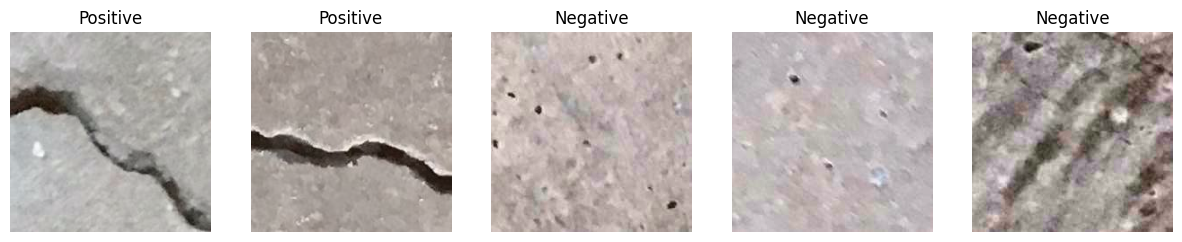

In [37]:
import matplotlib.pyplot as plt
# Plot the batch of 5 images with their predictions
plt.figure(figsize=(15, 15))
for i in range(5):
    img = images_5[i]
    img = (img - np.min(img)) / (np.max(img) - np.min(img))  # Normalize to [0, 1]

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)  # Display the image
    plt.title(class_predictions_vgg16[i])
    plt.axis('off')  # Hide the axes
plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).